In [1]:
import pandas as pd
import numpy as np
%pylab inline
import seaborn as sns
# import the file
df = pd.read_csv('~/Desktop/Churn_Modelling.csv',error_bad_lines=False)

print(len(df))


Populating the interactive namespace from numpy and matplotlib
10000


In [2]:
df['Exited'].value_counts()

#80-20 split for retained vs churned customers

0    7963
1    2037
Name: Exited, dtype: int64

In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
#Convert categorical variables to string:
df['CustomerId']=df['CustomerId'].astype(str)
df['HasCrCard']=df['HasCrCard'].astype(str)
df['IsActiveMember']=df['IsActiveMember'].astype(str)


df.describe()

##Level of the table = customerId : checked #rows = #rows when grouped by customerId

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881,0.203700
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,0.402769
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,0.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,0.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,0.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,0.000000
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,1.000000


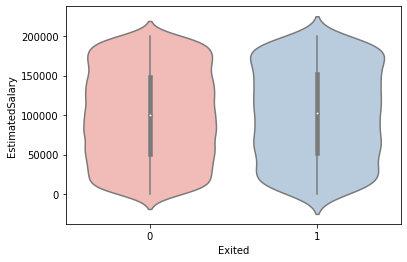

In [5]:
#df.boxplot(by='Exited',column=['EstimatedSalary'],grid=False, notch=True, vert=True,patch_artist=True, )

import seaborn as sns
sns.violinplot(x="Exited", y="EstimatedSalary", data=df, palette="Pastel1")



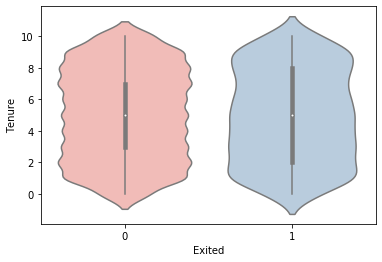

In [6]:
#df.boxplot(by='Exited',column=['Tenure'],grid=False)

sns.violinplot(x="Exited", y="Tenure", data=df, palette="Pastel1")

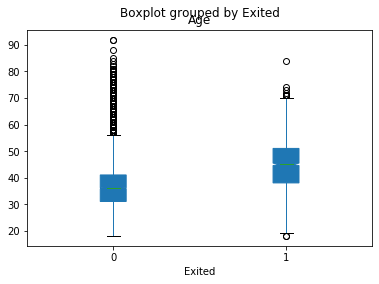

In [7]:
df.boxplot(by='Exited',column=['Age'],grid=False,notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True)

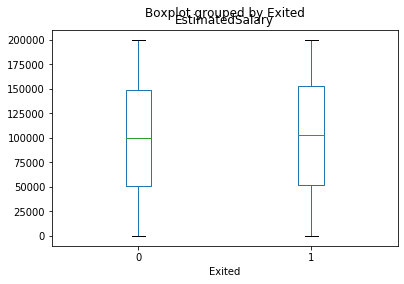

In [8]:
df.boxplot(by='Exited',column=['EstimatedSalary'],grid=False)

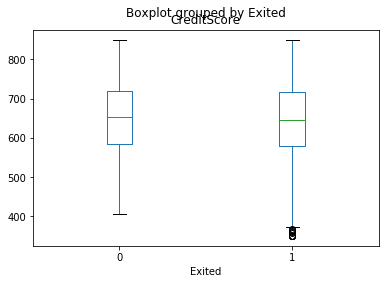

In [9]:
df.boxplot(by='Exited',column=['CreditScore'],grid=False)  ## Not a distinguishing factor

([<matplotlib.patches.Wedge at 0x1a220ca198>,
 [Text(0.24845851424237828, 1.0715728471272823, 'Female'),
  Text(-0.24845841391448678, -1.0715728703896426, 'Male')],
 [Text(0.13552282595038814, 0.5844942802512448, '42.7%'),
  Text(-0.1355227712260837, -0.584494292939805, '57.3%')])

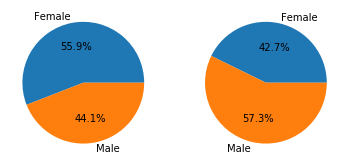

In [10]:
#pie chart 

df5=df.groupby(by=['Gender','Exited'])['RowNumber'].agg('count')

#df5.columns=['Customer']

df4=df5.reset_index()

# PLot 2 pie charts 

df_churn=df4[df4['Exited']==1][['Gender','RowNumber']]
df_ret=df4[df4['Exited']==0][['Gender','RowNumber']]


plt.subplot(1, 2, 1)
plt.pie(df_churn['RowNumber'],labels=df_churn['Gender'],autopct='%1.1f%%')
        #labels=df_churn['Gender'], colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt

plt.subplot(1, 2, 2)
plt.pie(df_ret['RowNumber'],labels=df_ret['Gender'],autopct='%1.1f%%')
        #labels=df_ret['Gender'],autopct='%1.1f%%', shadow=True, startangle=140)

  Geography  Exited  CustomerId
0    France       0        4204
1    France       1         810
2   Germany       0        1695
3   Germany       1         814
4     Spain       0        2064
5     Spain       1         413


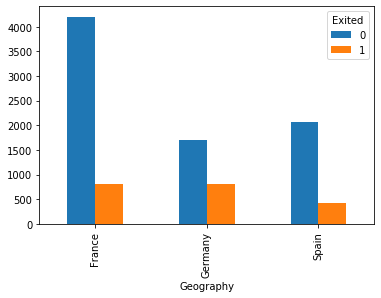

In [20]:
geo_plt=pd.DataFrame(df.groupby(['Geography','Exited'])['CustomerId'].count()) 
geo_plt.reset_index(inplace=True)
print(geo_plt)
#geo_plt['Geography']=geo_plt['Geography'].astype(str)
#geo_plt['Exited']=geo_plt['Exited'].astype(str)

geo_plt.pivot("Geography","Exited","CustomerId").plot(kind='bar')

### Germany seems to have more churn 

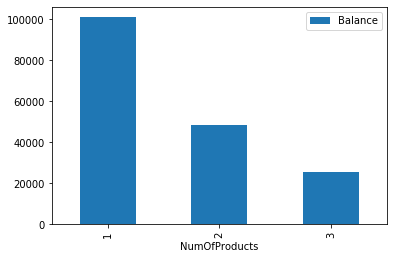

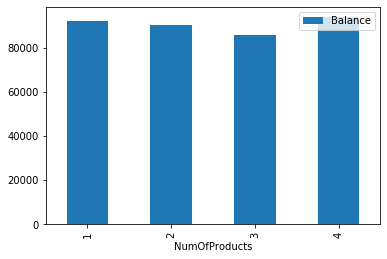

In [12]:
## number of products vs balance :

df[df['Exited']==0].groupby(['NumOfProducts'])[['Balance']].agg('mean').plot(kind='bar')
df[df['Exited']==1].groupby(['NumOfProducts'])[['Balance']].agg('mean').plot(kind='bar')


Exited             0     1
IsActiveMember            
0               3547  1302
1               4416   735


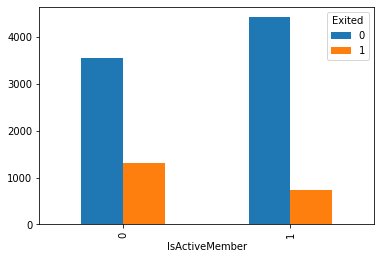

In [21]:
actv_plt=pd.DataFrame(df.groupby(['IsActiveMember','Exited'])['CustomerId'].count()) 
actv_plt=actv_plt.reset_index()

actv_plt.pivot("IsActiveMember","Exited","CustomerId").plot(kind='bar')

print(actv_plt.pivot("IsActiveMember","Exited","CustomerId"))
#37% of non-active members churn vs 17% of active members churn

In [14]:
card_plt=pd.DataFrame(df.groupby(['HasCrCard','Exited'])['CustomerId'].count()) 
card_plt

#26% of customers without credit card churn vs 25.2% customers with credit card churn - => might not be a deciding fator

CustomerId
HasCrCard Exited            
0         0             2332
          1              613
1         0             5631
          1             1424

In [22]:
#Pie Chart 

import matplotlib.pyplot as plt

plt.figure(0)
df_churn=df[df['Exited']==1]
chun_plt=df_churn['Gender'].value_counts()
chun_plt=pd.DataFrame(chun_plt)
print(chun_plt)

plt.figure(1)


plt.show()

        Gender
Female    1139
Male       898


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

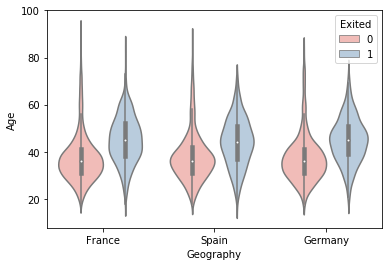

In [16]:
import seaborn as sns
sns.violinplot(x="Geography", y="Age",hue='Exited', data=df, palette="Pastel1")

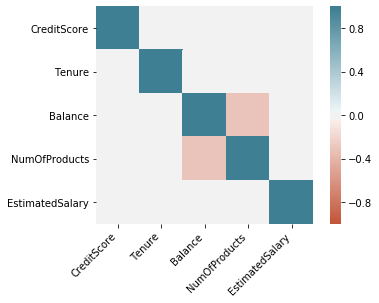

In [17]:
# Correlation Matrix Heat Map

df2=df[['CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary']]

corr = df2.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

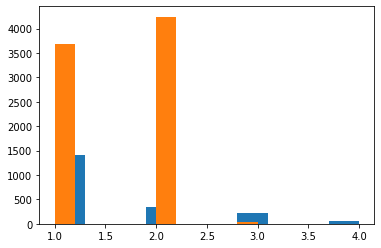

In [18]:
#Histogram for no. of products



df[df['Exited']==1]['NumOfProducts'].hist(grid=False)
df[df['Exited']==0]['NumOfProducts'].hist(grid=False)

([<matplotlib.patches.Wedge at 0x1a22813898>,
 [Text(0.24845851424237828, 1.0715728471272823, 'Female'),
  Text(-0.24845841391448678, -1.0715728703896426, 'Male')],
 [Text(0.13552282595038814, 0.5844942802512448, '42.7%'),
  Text(-0.1355227712260837, -0.584494292939805, '57.3%')])

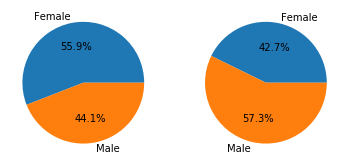

In [19]:
#pie chart 

df5=df.groupby(by=['Gender','Exited'])['RowNumber'].agg('count')

#df5.columns=['Customer']

df4=df5.reset_index()

# PLot 2 pie charts 

df_churn=df4[df4['Exited']==1][['Gender','RowNumber']]
df_ret=df4[df4['Exited']==0][['Gender','RowNumber']]


plt.subplot(1, 2, 1)
plt.pie(df_churn['RowNumber'],labels=df_churn['Gender'],autopct='%1.1f%%')
        #labels=df_churn['Gender'], colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt

plt.subplot(1, 2, 2)
plt.pie(df_ret['RowNumber'],labels=df_ret['Gender'],autopct='%1.1f%%')
        #labels=df_ret['Gender'],autopct='%1.1f%%', shadow=True, startangle=140)

